# Project Report 2: A Chaotic Nonlinear Pendulum
## Author: Sophie Chun
### Date: Feb 24, 2020
### Other group members: None
<div style="text-align: justify"> <br> The objective of this project is to model a motion of a non-idealized pendulum that oscillates in a non-infinitesimal amplitude and to compare the pendulum's oscillatory cycle with different initial parameters.

### Problem Analysis 
#### Physical Considerations <div>
<div style="text-align:justify"> The pendulum is a mass suspended from a pivot by a gravitational force so that it oscillates. When a pendulum is displaced away from its resting position, which is an equilibrium position, it is subject to a restoring force that accelerates it back toward the equilibrium position due to gravity. Thus, the pendulum oscillates back and forth about the equilibrium position once it is released. The time it takes for the one complete oscillatory cycle is a period of the pendulum. The period depends on the length of the pendulum string, the amplitude, and the width of the pendulum's swing. In this problem, considering a non-idealized pendulum, oscillating with a non-infinitesimal amplitude with a linear damping effect. There is a total of six changeable parameters in this system. These parameters are $\Omega$, $a$, $g$, $\theta$, $\gamma$ and $l$. Each of these variables represents a different feature and should be defined first. They all represent a non-idealized pendulum system. To avoid excessive exception checks, the problem is simplified with an assumption that the rod or string in which the mass is attached to is massless and that the motion occurs only in two dimensions with a constant gravitational field.
    
#### Coding considerations <div>
<div style="text-align: justify"> A model of the chaotic non-linear pendulum system is a dynamic model to find the motion of the pendulum throughout its oscillation. It is a deterministic model, because the pendulum system depends on the mass at the end of the string, the length of the string, and an angle which the pendulum's axis forms with respect to its vertical axis. These variables make up for a periodic force, which creates an oscillation of the pendulum, a linear damping parameter, which is proportional to its velocity, and the restoring torque. The variable of interest, the motion of the pendulum, is a continuous variable. To initialize the problem, amplitude and the angle of the periodic force, the mass, length of the string, and the angle from its vertical axis are specified first. Then, Newton's equation of motion of this system is separated into two coupled first-order ordinary differential equations to apply to Runge Kutta integrator and odeint() python module integrator method.

### Model Derivation and Development<div>
<div style="text-align: justify"> Newton's equation of motion is accounted for in order to compute and compare the pendulum's oscillation. Dynamics of rotational motion is described by the differential equation<br>
    
$$\omega = \frac{d^2\theta}{d t^2}=\frac{M}{I}$$

<div style="text-align: justify"> <br>where $\omega$ is the angular acceleration, $M$ is the restoring torque force, and $I$ is the moment of inertia about the axis of rotation. In this problem, the torque is determined by the tangential direction of the gravitational force, which is
    
$$M=-mgl\sin\theta$$ <br>

<div style="text-align: justify"> The minus sign here indicates the characteristic of restoring force, which means that the restoring force is always in the opposite direction from the direction of the velocity. The moment of inertia of the pendulum is
    
$$I=ml^2$$

<div style="text-align: justify"> Thus, the equation becomes

$$\frac{d^2\theta}{d t^2} = -\frac{mgl\sin\theta}{ml^2}$$

$$ml^2\frac{d^2\theta}{d t^2} = -mgl\sin\theta$$

<div style="text-align: justify"> <br>Because the problem involves the linear drag force and the driving force, the whole equation becomes <br>

$$ml^2\frac{d^2\theta}{d t^2} = -m g l \sin \theta -\gamma v + A \sin \Omega t  .$$

<div style="text-align: justify"> <br> By simplifying with defining $\gamma'= \gamma/(ml)$, $a = A/(ml^2)$, and the angular velocity $\omega = \frac{d\theta}{dt}=\frac{v}{l}$, the whole equation becomes <br>

$$\frac{d^2\theta}{d t^2} = -\frac{g}{l} \sin \theta -\gamma' \omega + a \sin \Omega t  .$$ 

<div style="text-align: justify"> <br> Although this seems like a single equation, it is the second order differential equation with respect to $\theta$. Thus, this one second order equation can be separated into two coupled first order ordinary differential equations,

\begin{eqnarray}
\frac{d\theta}{dt} &=& \omega\\
\frac{d \omega}{dt} &=& -\frac{g}{l} \sin \theta -\gamma' \omega + a \sin \Omega t .
\end{eqnarray}

<div style="text-align: justify"> 
    
<br>Using `RK2SystemsArg()` solver, or the built-in `odeint()`, this system of equations can be solved. 

### Model Implementation

<div style="text-align: justify"> <br> Model implementation involves several steps to minimize the errors: initialzing the parameters, checking for initial exceptions, introducing Runge-Kutta and built-in odeint() integrators, and several verification steps to ensure that the code works and provide detailed understanding of a chaotic system.

#### Initialization of Parameters and Function

In [1]:
import numpy as np                  # importing the numpy module

dt = 2.5e-3                         # time step for integration (seconds)
SimulationTime = 150.0              # time to solve for (seconds)
P0 = np.array((0,0))                # initial conditions for theta and omega, 0 and 0
t=np.arange(0,SimulationTime+dt,dt) # creating an array of times to solve for the populations at t

gamma = 10                          # gamma prime, which is defined to be drag coefficient over the prouduct of the mass and length
g = 9.81                            # the magnitude of gravity (ms^-2)
l = 10                              # pendulum length (m)

a = 8                               # amplitude of a driven force over the product of the mass and the length squared
OMEGA = 0.5                         # the frequency component in the driven force

In [2]:
def ThetaOmega(TO, t, OMEGA, gamma, g, l, a):
    """
    This function returns a numpy array of 2 numbers, angle that the pendulum forms from its equilibrium axis (which is defined to be vertical axis),
    and the angular velocity of the pendulum.
    
    Usage: 
        derivatives = ThetaOmega(TO, t, args):

        Population -- an array of 2 numbers -- angle and the angular velocity
        t -- time, unused, needed for compatibility with odeint() and RK2 integrators
        OMEGA, gamma, g, l, a - the parameters of the pendulum dynamics as described in the notebook above
        
        derivatives - numpy array of 2 numbers, rate of change of the angle and the angular velocity
    """
    dtheta = TO[1]
    domega = (-g/l) * np.sin(TO[0]) - gamma*TO[1] + a*np.sin(OMEGA*t)
    
    return np.array((dtheta, domega))

#### Initial Exception Check

In [3]:
ErrVal = 0 # to keep track of whether any error is encountered or not, initial value 

if dt <= 0 :
    print("dt value is invalid. Time step must be a positive value.")
    ErrVal = 1;
elif SimulationTime <= 0:
    print("SimulationTime value is invalid. The time to simulate the pendulum system should be a positive value.")
    ErrVal = 1;
elif len(P0) != 2:
    print("Array P0 is invalid. P0, 1-D array, must involve two elements.")
    ErrVal = 1;
elif P0[0] * P0[1] < 0:
    print("Array P0 invalid. The array's elements should not be negative values.")
    ErrVal = 1;
elif gamma < 0:
    print("gamma value is invalid. The magnitude of gamma should be a positive value.")
    ErrVal = 1;
elif l <= 0:
    print("l value is invalid. Length of the pendulum should be a positive value.")
    ErrVal = 1;
# The gravity should be positive, because the magnitude is only considered in this case.
elif g <= 0:
    print("gravity value is invalid. The value of gravity should be negative since it points downward.")
    ErrVal = 1;
else:
    ErrVal = 0;

#### Main RK2 and odeint() Integrator Methods

In [4]:
# RK2
def RK2SystemArg(xPrime, x0, t, args=()):
    """
    Solves a system of ODEs using the Runge-Kutta second order (RK2) method. 
    Allows passing arguments to the function being integrated.

    Usage:
        x = RK2SystemArg(xPrime, x0, t, args=()):
    
        xPrime -- the right hand side of the equation dx/dt = f, which must be integrated; should return 
            a 1d numpy array of derivatives 
        x0 -- intitial condition for x; should be a 1-d numpy array of the same dimensions as the 
            return value of xPrime()
        t -- time points, at which the value of the solution is needed, should be a 1-d numpy array
        args=() -- tuple of arguments to be passes to the xPrime function 
        
        x -- 2-d numpy array of values of the solution vector at every requested time point
        
    The function does not check for whether the dimensionality of x0 and the return argument of xPrime()
    match, and the function will fail if they don't.
    """
    x  = np.zeros((t.size, x0.size))  # initiatize the array of results at requested time points
    dt = np.diff(t)                   # time steps
    x[0,:] = x0                       # set the initial conditions
    for i in range(1, t.size):        # Loop over all time steps
        der = xPrime(x[i-1,:], t[i-1], *args)        # current derivative
        pred = x[i-1,:] + dt[i-1] * der              # predicted variable value
        pred_der = xPrime(pred, t[i], *args)         # predicted future derivative
        x[i,:] = x[i-1,:]+0.5*(der+pred_der)*dt[i-1] # corrected variable value
    return x

PRK2 = RK2SystemArg(ThetaOmega, P0, t, args=(OMEGA,gamma,g,l,a))

In [5]:
# odeint()
from scipy.integrate import odeint
POdeInt = odeint(ThetaOmega, P0, t, args=(OMEGA,gamma,g,l,a))
print("RK2: The final solution of theta and omega are", PRK2[-1],".")
print("POdeInt: The final solution of theta and omega are", POdeInt[-1],".")

RK2: The final solution of theta and omega are [-1.50797953 -0.24858748] .
POdeInt: The final solution of theta and omega are [-1.50797978 -0.2485876 ] .


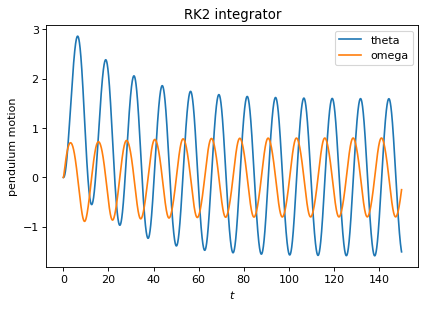

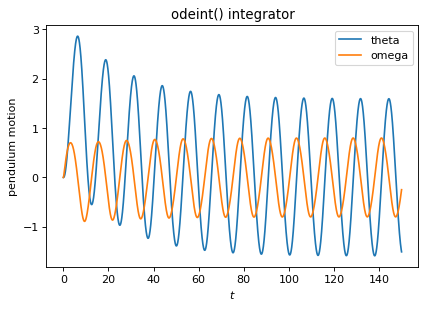

In [6]:
import matplotlib.pyplot as plt # importing plotting functions
%matplotlib inline

fig, ax = plt.subplots(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(t, PRK2[:,0],label='theta')
plt.plot(t, PRK2[:,1],label='omega')
plt.legend()
plt.title('RK2 integrator')
plt.xlabel('$t$')
plt.ylabel('pendulum motion')
plt.show()

fig, ax = plt.subplots(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(t, POdeInt[:,0],label='theta')
plt.plot(t, POdeInt[:,1],label='omega')
plt.legend()
plt.title('odeint() integrator')
plt.xlabel('$t$')
plt.ylabel('pendulum motion')
plt.show()

### Model Verification

**1. When the pendulum undergoes a harmonic oscillation**
<div style="text-align: justify"> <br> The period of a pendulum does not depend on the mass of the bob at the end of the string, but only on the length of the string. Simple harmonic motion is the motion of a pendulum when it is only subject to the linear restoring force given by Hooke's law. The motion is sinusoidal in time and demonstrates a single frequency. In this case where both driving force and the linear drag are absent, the sinusoidal and constant motion over the time is shown.

RK2: The final solution of theta and omega are [ 0.52512992 -0.47520624] .
POdeInt: The final solution of theta and omega are [ 0.52517036 -0.47516418] .


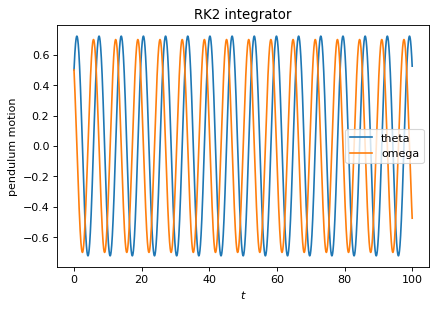

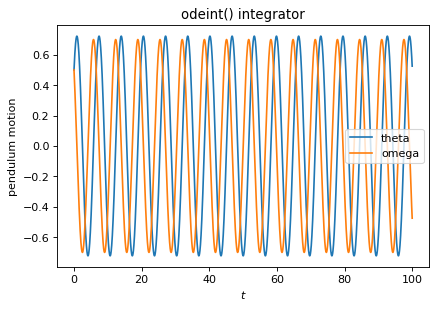

In [7]:
dt = 2.5e-3                         # time step for integration (seconds)
SimulationTime = 100.0              # time to solve for (seconds)
P0 = np.array((0.5,0.5))            # initial conditions for theta and omega, 0.5 and 0.5
t=np.arange(0,SimulationTime+dt,dt) # creating an array of times to solve for the populations at t

gamma = 0                           # gamma prime, which is defined to be drag coefficient over the prouduct of the mass and length
g = 9.81                            # the magnitude of gravity (ms^-2)
l = 10.0                            # pendulum length (m)

a = 0                               # amplitude of a driven force over the product of the mass and the length squared
OMEGA = 0                           # the frequency component in the driven force

PRK2 = RK2SystemArg(ThetaOmega, P0, t, args=(OMEGA,gamma,g,l,a))
POdeInt = odeint(ThetaOmega, P0, t, args=(OMEGA,gamma,g,l,a))
print("RK2: The final solution of theta and omega are", PRK2[-1],".")
print("POdeInt: The final solution of theta and omega are", POdeInt[-1],".")

%matplotlib inline
fig, ax = plt.subplots(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(t, PRK2[:,0],label='theta')
plt.plot(t, PRK2[:,1],label='omega')
plt.legend()
plt.title('RK2 integrator')
plt.xlabel('$t$')
plt.ylabel('pendulum motion')
plt.show()

fig, ax = plt.subplots(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(t, POdeInt[:,0],label='theta')
plt.plot(t, POdeInt[:,1],label='omega')
plt.legend()
plt.title('odeint() integrator')
plt.xlabel('$t$')
plt.ylabel('pendulum motion')
plt.show()

**2. When the viscosity is effective but driving force is absent** <br>
<div style="text-align: justify"> In contrast to the basic classical example of a simple harmonic motion of the simple pendulum, the amplitude of a simple pendulum continuously decreases in real life example. This is because the pendulum's mechanical energy is gradually lost due to air resistance. Without driving force which opposes the air resistance, the amplitude decreases exponentially as demonstrated below. 

RK2: The final solution of theta and omega are [-8.02226574e-05 -4.37085561e-06] .
POdeInt: The final solution of theta and omega are [-7.99426987e-05 -4.30478888e-06] .


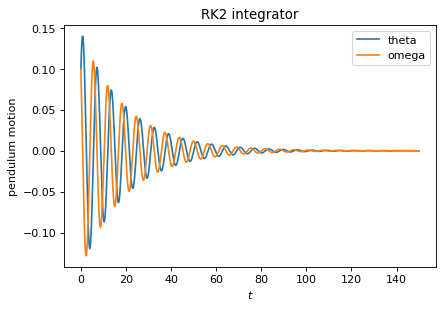

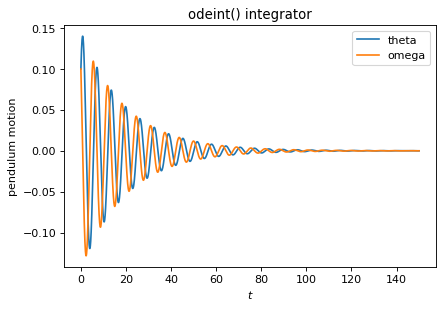

In [8]:
dt = 2.5e-3                         # time step for integration (seconds)
SimulationTime = 150.0              # time to solve for (seconds)
P0 = np.array((0.1,0.1))            # initial conditions for theta and omega, 0.1 and 0.1
t=np.arange(0,SimulationTime+dt,dt) # creating an array of times to solve for the populations at t

gamma = 0.1                         # gamma prime, which is defined to be drag coefficient over the prouduct of the mass and length
g = 9.81                            # the magnitude of gravity (ms^-2)
l = 10.0                            # pendulum length (m)

a = 0                               # amplitude of a driven force over the product of the mass and the length squared
OMEGA = 0                           # the frequency component in the driven force

PRK2 = RK2SystemArg(ThetaOmega, P0, t, args=(OMEGA,gamma,g,l,a))
POdeInt = odeint(ThetaOmega, P0, t, args=(OMEGA,gamma,g,l,a))
print("RK2: The final solution of theta and omega are", PRK2[-1],".")
print("POdeInt: The final solution of theta and omega are", POdeInt[-1],".")

%matplotlib inline
fig, ax = plt.subplots(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(t, PRK2[:,0],label='theta')
plt.plot(t, PRK2[:,1],label='omega')
plt.legend()
plt.title('RK2 integrator')
plt.xlabel('$t$')
plt.ylabel('pendulum motion')
plt.show()

fig, ax = plt.subplots(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(t, POdeInt[:,0],label='theta')
plt.plot(t, POdeInt[:,1],label='omega')
plt.legend()
plt.title('odeint() integrator')
plt.xlabel('$t$')
plt.ylabel('pendulum motion')
plt.show()

**3. When the driving force is small that makes oscillation at the driving frequency** <br>
<div style="text-align: justify"> A periodic driving force will try to impose its own frequency on the pendulum. In the real system, the dissipative force will cause the free oscillations to die out. After a sufficient time, only the forced oscillations of a certain frequency remains, and this is called <b>steady-state</b> motion of the driven oscillator. Unlike the second verification step, because of the driving force, the amplitude does not decrease further once it reaches equilibrium of the change in amplitude.

RK2: The final solution of theta and omega are [0.00782203 0.00071904] .
POdeInt: The final solution of theta and omega are [0.00782187 0.00071887] .


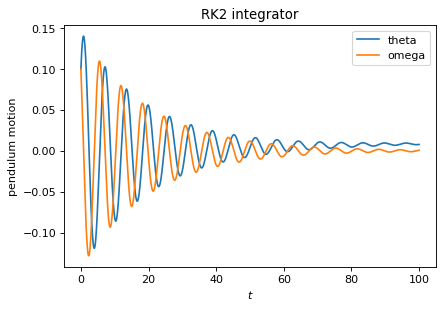

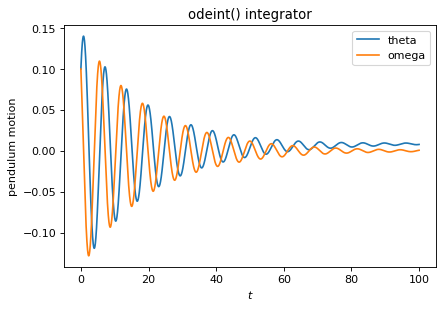

In [9]:
dt = 2.5e-3                         # time step for integration (seconds)
SimulationTime = 100.0              # time to solve for (seconds)
P0 = np.array((0.1,0.1))            # initial conditions for theta and omega, 20 and 10
t=np.arange(0,SimulationTime+dt,dt) # creating an array of times to solve for the populations at t

gamma = 0.1                         # gamma prime, which is defined to be drag coefficient over the prouduct of the mass and length
g = 9.81                            # the magnitude of gravity (ms^-2)
l = 10.0                            # pendulum length (m)

a = 0.01                            # amplitude of a driven force over the product of the mass and the length squared
OMEGA = 0.01                        # the frequency component in the driven force

PRK2 = RK2SystemArg(ThetaOmega, P0, t, args=(OMEGA,gamma,g,l,a))
POdeInt = odeint(ThetaOmega, P0, t, args=(OMEGA,gamma,g,l,a))
print("RK2: The final solution of theta and omega are", PRK2[-1],".")
print("POdeInt: The final solution of theta and omega are", POdeInt[-1],".")

%matplotlib inline
fig, ax = plt.subplots(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(t, PRK2[:,0],label='theta')
plt.plot(t, PRK2[:,1],label='omega')
plt.legend()
plt.title('RK2 integrator')
plt.xlabel('$t$')
plt.ylabel('pendulum motion')
plt.show()

fig, ax = plt.subplots(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(t, POdeInt[:,0],label='theta')
plt.plot(t, POdeInt[:,1],label='omega')
plt.legend()
plt.title('odeint() integrator')
plt.xlabel('$t$')
plt.ylabel('pendulum motion')
plt.show()

**4. When the pendulum experiences a resonance** <br>
<div style="text-align: justify"> Around the natural frequency, a large change in amplitude of the system is obtained. This is called <b>resonance</b>, and as it is shown in the graph below, the amplitude of the theta graph is greater than 1.5, over $\frac{\pi}{2}$. This is possible only when the frequency of the driving force equals to the $\sqrt\frac{g}{l}$. In order to compare with other values of the driving force frequency, two more graphs are plotted below -- one with lower value and the other with higher value than $\sqrt\frac{g}{l}$. It turns out that both two graphs do not show as high amplitude as the pendulum with resonance frequency.

RK2: The final solution of theta and omega are [ 1.13794668 -0.64801012] .
POdeInt: The final solution of theta and omega are [ 1.13794553 -0.64800803] .


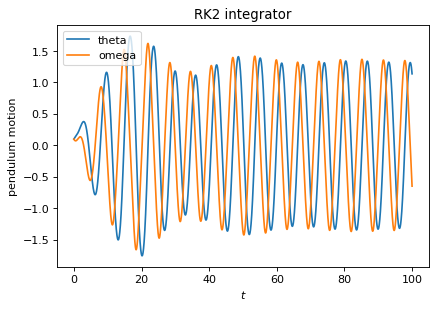

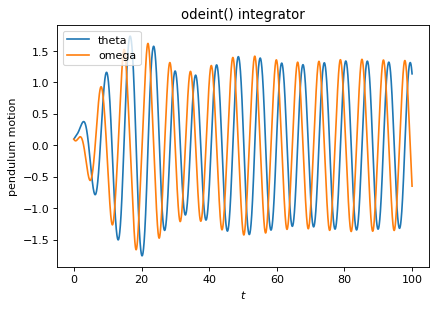

In [10]:
dt = 2.5e-3                         # time step for integration (seconds)
SimulationTime = 100.0              # time to solve for (seconds)
P0 = np.array((0.1,0.1))            # initial conditions for theta and omega, 20 and 10
t=np.arange(0,SimulationTime+dt,dt) # creating an array of times to solve for the populations at t

gamma = 0.1                         # gamma prime, which is defined to be drag coefficient over the prouduct of the mass and length
g = 9.81                            # the magnitude of gravity (ms^-2)
l = 10.0                            # pendulum length (m)

a = 0.3                             # amplitude of a driven force over the product of the mass and the length squared
OMEGA = np.sqrt(g/l)                # the frequency component in the driven force, which is about 0.99

PRK2 = RK2SystemArg(ThetaOmega, P0, t, args=(OMEGA,gamma,g,l,a))
POdeInt = odeint(ThetaOmega, P0, t, args=(OMEGA,gamma,g,l,a))
print("RK2: The final solution of theta and omega are", PRK2[-1],".")
print("POdeInt: The final solution of theta and omega are", POdeInt[-1],".")

fig, ax = plt.subplots(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(t, PRK2[:,0],label='theta')
plt.plot(t, PRK2[:,1],label='omega')
plt.legend()
plt.title('RK2 integrator')
plt.xlabel('$t$')
plt.ylabel('pendulum motion')
plt.show()

fig, ax = plt.subplots(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(t, POdeInt[:,0],label='theta')
plt.plot(t, POdeInt[:,1],label='omega')
plt.legend()
plt.title('odeint() integrator')
plt.xlabel('$t$')
plt.ylabel('pendulum motion')
plt.show()

RK2: The final solution of theta and omega are [-0.14196659  0.20132529] .
POdeInt: The final solution of theta and omega are [-0.14196666  0.20132532] .


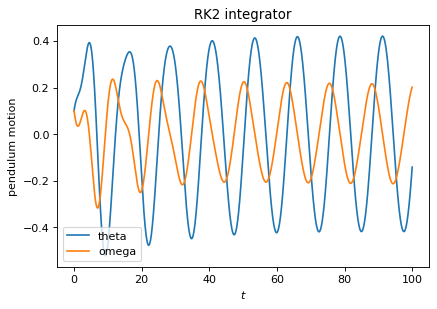

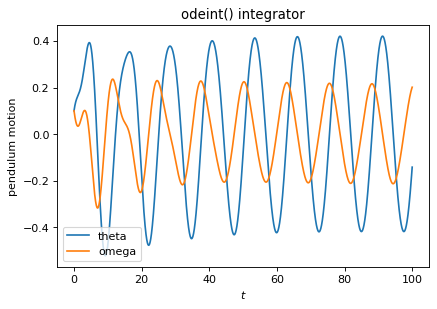

In [11]:
OMEGA = 0.5    # the frequency component in the driven force

PRK2 = RK2SystemArg(ThetaOmega, P0, t, args=(OMEGA,gamma,g,l,a))
POdeInt = odeint(ThetaOmega, P0, t, args=(OMEGA,gamma,g,l,a))
print("RK2: The final solution of theta and omega are", PRK2[-1],".")
print("POdeInt: The final solution of theta and omega are", POdeInt[-1],".")

fig, ax = plt.subplots(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(t, PRK2[:,0],label='theta')
plt.plot(t, PRK2[:,1],label='omega')
plt.legend()
plt.title('RK2 integrator')
plt.xlabel('$t$')
plt.ylabel('pendulum motion')
plt.show()

fig, ax = plt.subplots(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(t, POdeInt[:,0],label='theta')
plt.plot(t, POdeInt[:,1],label='omega')
plt.legend()
plt.title('odeint() integrator')
plt.xlabel('$t$')
plt.ylabel('pendulum motion')
plt.show()

RK2: The final solution of theta and omega are [ 0.14408985 -0.274081  ] .
POdeInt: The final solution of theta and omega are [ 0.14408944 -0.27408045] .


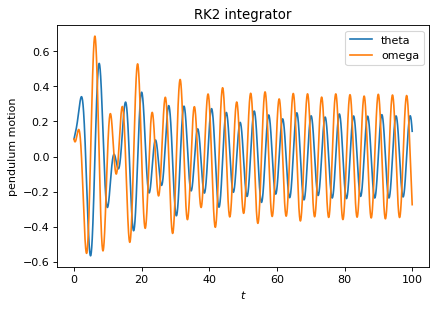

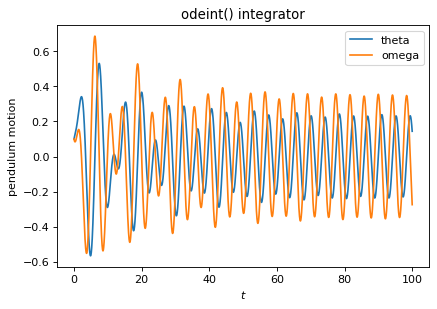

In [12]:
OMEGA = 1.5    # the frequency component in the driven force

PRK2 = RK2SystemArg(ThetaOmega, P0, t, args=(OMEGA,gamma,g,l,a))
POdeInt = odeint(ThetaOmega, P0, t, args=(OMEGA,gamma,g,l,a))
print("RK2: The final solution of theta and omega are", PRK2[-1],".")
print("POdeInt: The final solution of theta and omega are", POdeInt[-1],".")

fig, ax = plt.subplots(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(t, PRK2[:,0],label='theta')
plt.plot(t, PRK2[:,1],label='omega')
plt.legend()
plt.title('RK2 integrator')
plt.xlabel('$t$')
plt.ylabel('pendulum motion')
plt.show()

fig, ax = plt.subplots(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(t, POdeInt[:,0],label='theta')
plt.plot(t, POdeInt[:,1],label='omega')
plt.legend()
plt.title('odeint() integrator')
plt.xlabel('$t$')
plt.ylabel('pendulum motion')
plt.show()

### Discussion <br>
<div style = "text-align: justify"> This non-idealized pendulum system is interesting to explore as some parameters make the system chaotic. A damped driven pendulum is a chaotic system, which means the future behavior of the pendulum is dependent on the specific initial conditions. A tiny change in any parameter can cause huge changes after a short period of time, which is called <em>butterfly effect</em>. In the following discussion part, a more detailed analysis of this chaotic driven pendulum is done by finding and comparing different parameter values that make the system chaotic and periodic. Also, the trajectory of the system and parametric plot of the system's trajectory are plotted. In this section, only odeint() method is used.

#### Chaotic vs. Periodic System <br>
<div style = "text-align: justify"> To show if the system is chaotic or periodic, trajectory of the system $\theta(t)$ is plotted with two different initial conditions of $\theta(0)$. Two systems have a difference of $10^{-2}$ radian when $\theta(0)$. The first system has its initial angle and angular velocity of $1.00$, while the second system has its initial angle and angular velocity of $1.01$. It is shown that in the chaotic system, two trajectories diverge even though they start at close values. This is in contrast to the simple periodic motion with two close initial conditions result in staying close over the time.

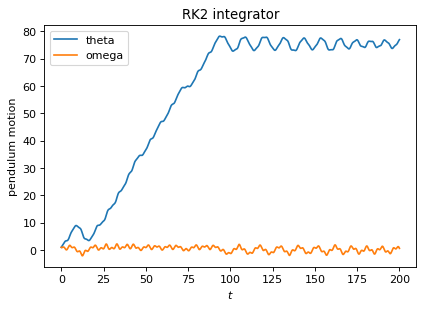

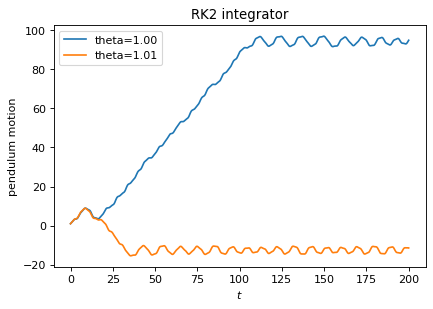

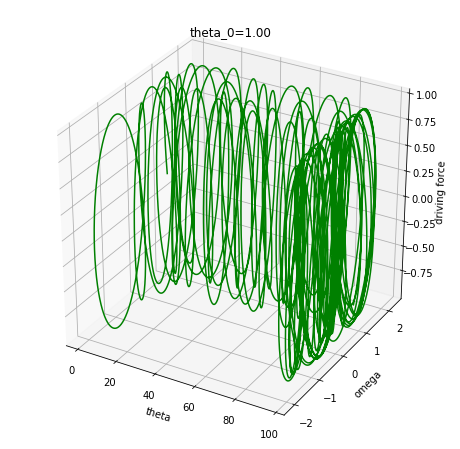

In [13]:
#chaotic
dt = 2.5e-3                         # time step for integration (seconds)
SimulationTime = 200.0              # time to solve for (seconds)
P0 = np.array((1.00,1.00))          # initial conditions for theta and omega
P1 = np.array((1.01,1.01))          # initial conditions for theta and omega

t=np.arange(0,SimulationTime+dt,dt) # creating an array of times to solve for the populations at t

gamma = 0.01                        # gamma prime, which is defined to be drag coefficient over the prouduct of the mass and length
g = 9.81                            # the magnitude of gravity (ms^-2)
l = 15                              # pendulum length (m)

a = 1                               # amplitude of a driven force over the product of the mass and the length squared
OMEGA = 2                           # the frequency component in the driven force

POdeInt0 = odeint(ThetaOmega, P0, t, args=(OMEGA,gamma,g,l,a))
POdeInt1 = odeint(ThetaOmega, P1, t, args=(OMEGA,gamma,g,l,a))
PRK2 = RK2SystemArg(ThetaOmega, P0, t, args=(OMEGA,gamma,g,l,a))

%matplotlib inline
fig, ax = plt.subplots(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(t, PRK2[:,0],label='theta')
plt.plot(t, PRK2[:,1],label='omega')
plt.legend()
plt.title('RK2 integrator')
plt.xlabel('$t$')
plt.ylabel('pendulum motion')
plt.show()

fig, ax = plt.subplots(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(t, POdeInt0[:,0],label='theta=1.00')
plt.plot(t, POdeInt1[:,0],label='theta=1.01')
plt.legend()
plt.title('RK2 integrator')
plt.xlabel('$t$')
plt.ylabel('pendulum motion')
plt.show()

# three-dimensional plot
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
xline = POdeInt0[:,0]
yline = POdeInt0[:,1]
zline = a*np.sin(OMEGA*t)
ax.plot3D(xline, yline, zline, 'green')
ax.set_xlabel('theta')
ax.set_ylabel('omega')
ax.set_zlabel('driving force')
plt.title('theta_0=1.00')
plt.show()

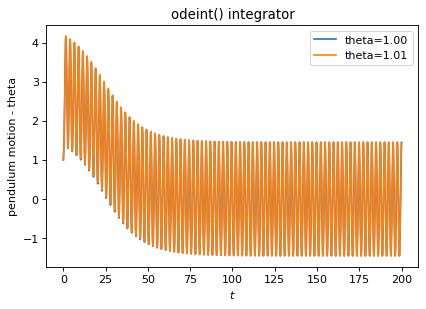

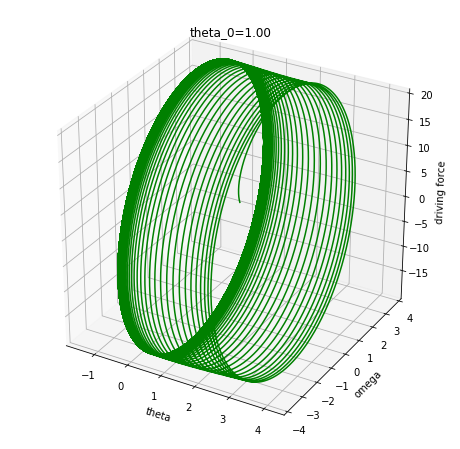

In [14]:
#periodic
dt = 2.5e-3                         # time step for integration (seconds)
SimulationTime = 200.0              # time to solve for (seconds)
P0 = np.array((1.00,1.00))          # initial conditions for theta and omega
P1 = np.array((1.01,1.01))          # initial conditions for theta and omega

t=np.arange(0,SimulationTime+dt,dt) # creating an array of times to solve for the populations at t

gamma = 5                           # gamma prime, which is defined to be drag coefficient over the prouduct of the mass and length
g = 9.81                            # the magnitude of gravity (ms^-2)
l = 15                              # pendulum length (m)

a = 20                              # amplitude of a driven force over the product of the mass and the length squared
OMEGA = 2.5                         # the frequency component in the driven force

POdeInt0 = odeint(ThetaOmega, P0, t, args=(OMEGA,gamma,g,l,a))
POdeInt1 = odeint(ThetaOmega, P1, t, args=(OMEGA,gamma,g,l,a))
PRK2 = RK2SystemArg(ThetaOmega, P0, t, args=(OMEGA,gamma,g,l,a))

%matplotlib inline
fig, ax = plt.subplots(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(t, POdeInt0[:,0],label='theta=1.00')
plt.plot(t, POdeInt1[:,0],label='theta=1.01')
plt.legend()
plt.title('odeint() integrator')
plt.xlabel('$t$')
plt.ylabel('pendulum motion - theta')
plt.show()

# three-dimensional plot
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
xline = POdeInt0[:,0]
yline = POdeInt0[:,1]
zline = a*np.sin(OMEGA*t)
ax.plot3D(xline, yline, zline, 'green')
plt.xlabel('theta')
plt.ylabel('omega')
ax.set_zlabel('driving force')
plt.title('theta_0=1.00')
plt.show()

<div style = "text-align: justify"> The pendulum is subject to friction, a linear drag, in this case, meaning that the pendulum slows down over time if there is no driving force. In fact, with the absence of a driving force and the linear drag force, the pendulum is verified to show harmonic oscillation. With all the forces, not every combination of the parameters leads to periodic motion. Some combinations of the parameters lead to chaotic motion. If the pendulum is driven at a small driving force, the system will be periodic. As shown in the verification step, the resultant steady-state of the pendulum is periodic as the transient effect of the system dies out. Then, the frequency of the pendulum is equal to the frequency of the driving force. In contrast, if the pendulum is driven at a greater driving force, the system appears to be periodic but in two different frequencies, and the difference in the two peaks is shown. If the driving force is increased further, then the system is unstable and becomes chaotic. In this case, the system never reaches a periodic state, even after a long period of time.

<div style = "text-align: justify"> <br> The code above shows different sets of parameters except for the angle and angular velocity that would determine the system to be either chaotic or periodic. For the chaotic scenario, $\gamma'$ is 0.01, $a$ is 1, and $\Omega$ is 2. In contrast, for the periodic scenario, $\gamma'$ is 5, $a$ is 20, and $\Omega$ is 2.5. In the chaotic scenario, the pendulum has a much larger driving force compared to its drag coefficient. Because the larger driving force can oppose the air resistance and keeps exerting the force on the pendulum, it becomes unstable and chaotic. In the periodic scenario, the pendulum with a smaller driving force opposes the air resistance up to a certain limit.
    
<div style = "text-align: justify"> <br> Finally, codes below compare the solutions of chaotic and periodic systems which are each evaluated with RK2 and odeint() integrators.

RK2: The final solution of theta and omega are [76.9826611   0.62435502] .
POdeInt: The final solution of theta and omega are [94.84828941  1.20205251] .


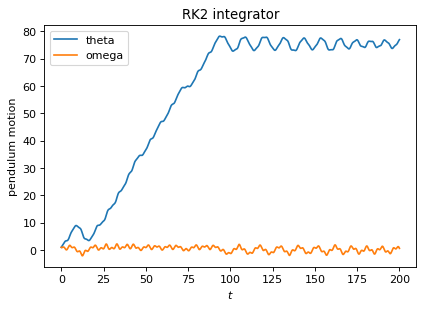

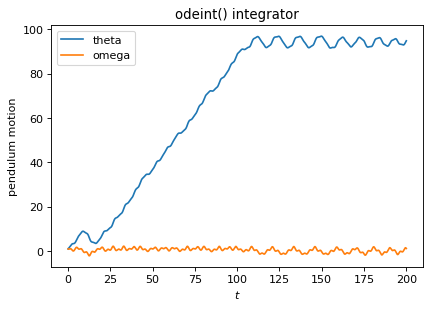

In [15]:
#chaotic
dt = 2.5e-3                         # time step for integration (seconds)
SimulationTime = 200.0              # time to solve for (seconds)
P0 = np.array((1.00,1.00))          # initial conditions for theta and omega

t=np.arange(0,SimulationTime+dt,dt) # creating an array of times to solve for the populations at t

gamma = 0.01                        # gamma prime, which is defined to be drag coefficient over the prouduct of the mass and length
g = 9.81                            # the magnitude of gravity (ms^-2)
l = 15                              # pendulum length (m)

a = 1                               # amplitude of a driven force over the product of the mass and the length squared
OMEGA = 2                           # the frequency component in the driven force

PRK2 = RK2SystemArg(ThetaOmega, P0, t, args=(OMEGA,gamma,g,l,a))
POdeInt0 = odeint(ThetaOmega, P0, t, args=(OMEGA,gamma,g,l,a))
print("RK2: The final solution of theta and omega are", PRK2[-1],".")
print("POdeInt: The final solution of theta and omega are", POdeInt0[-1],".")

%matplotlib inline
fig, ax = plt.subplots(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(t, PRK2[:,0],label='theta')
plt.plot(t, PRK2[:,1],label='omega')
plt.legend()
plt.title('RK2 integrator')
plt.xlabel('$t$')
plt.ylabel('pendulum motion')
plt.show()

fig, ax = plt.subplots(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(t, POdeInt0[:,0],label='theta')
plt.plot(t, POdeInt0[:,1],label='omega')
plt.legend()
plt.title('odeint() integrator')
plt.xlabel('$t$')
plt.ylabel('pendulum motion')
plt.show()


RK2: The final solution of theta and omega are [ 1.45039584 -0.19557139] .
POdeInt: The final solution of theta and omega are [ 1.45039892 -0.19556312] .


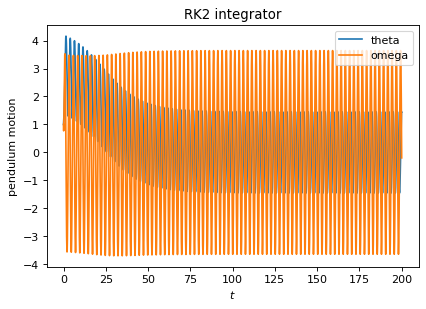

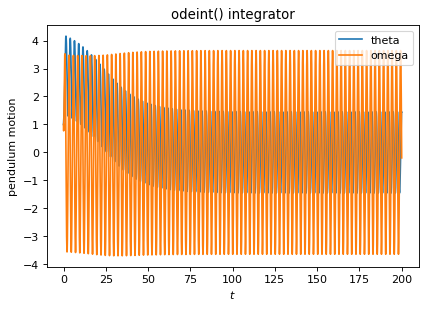

In [16]:
#periodic
dt = 2.5e-3                         # time step for integration (seconds)
SimulationTime = 200.0              # time to solve for (seconds)
P0 = np.array((1.00,1.00))          # initial conditions for theta and omega

t=np.arange(0,SimulationTime+dt,dt) # creating an array of times to solve for the populations at t

gamma = 5                           # gamma prime, which is defined to be drag coefficient over the prouduct of the mass and length
g = 9.81                            # the magnitude of gravity (ms^-2)
l = 15                              # pendulum length (m)

a = 20                              # amplitude of a driven force over the product of the mass and the length squared
OMEGA = 2.5                         # the frequency component in the driven force

PRK2 = RK2SystemArg(ThetaOmega, P0, t, args=(OMEGA,gamma,g,l,a))
POdeInt0 = odeint(ThetaOmega, P0, t, args=(OMEGA,gamma,g,l,a))
print("RK2: The final solution of theta and omega are", PRK2[-1],".")
print("POdeInt: The final solution of theta and omega are", POdeInt0[-1],".")

%matplotlib inline
fig, ax = plt.subplots(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(t, PRK2[:,0],label='theta')
plt.plot(t, PRK2[:,1],label='omega')
plt.legend()
plt.title('RK2 integrator')
plt.xlabel('$t$')
plt.ylabel('pendulum motion')
plt.show()

fig, ax = plt.subplots(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(t, POdeInt0[:,0],label='theta')
plt.plot(t, POdeInt0[:,1],label='omega')
plt.legend()
plt.title('odeint() integrator')
plt.xlabel('$t$')
plt.ylabel('pendulum motion')
plt.show()


<div style = "text-align: justify"> Comparing two final values of periodic and chaotic systems evaluated each with RK2 and odeint() integrators, it turns out that two integrators yield different results in chaotic system while similar results in periodic system. This is because of the uncertainty in RK2 integrator, because it only evaluates up to second order. Thus, built-in odeint() integrator yields more accurate value as difference occurs when two integrators evaluate the chaotic system, which is more unpredictable than periodic system.